![BCC](https://bccfilkom.net/static/assets/images/BCC-Logo.svg)

# Rainfall Predictions

# Methodology

Our ability to use the data within the decision making process is either lost or not maximized as all too often, **we don't have a solid understanding of the questions being asked** and how to apply the data correctly to the problem at hand. It's important to consider it because all too often there is a temptation to bypass methodology and jump directly to solutions.

Let's start with explaining what a methodology is. *Methodology* is a system of methods used in a particular area of study or activity.

So in this project, I will be using methodology called *Foundational Methodology for Data Science*.

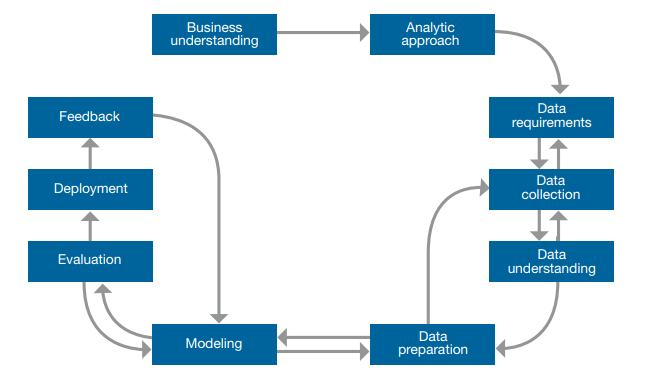

# Business understanding

.

# Analytic approach

.

# Data collection

In [38]:
import warnings
warnings.filterwarnings('ignore')

# Basic Library
import warnings
import os
import numpy as np
np.random.seed(7)
import pandas as pd
import statistics
import math
from timeit import default_timer as timer

# Preprocessing Library
#!pip install missingno
#import missingno as msno
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import vtreat
from scipy.stats.mstats import winsorize

# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import missingno as mno

#import matplotlib.pylab as pylab

# Fast EDA
from dataprep.eda import create_report

# Dimentionality Reduction & Normalization Library
#from sklearn.preprocessing import normalize
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import pickle
#!pip install pycaret
import pycaret

# Model Evaluation Library
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Downgrading numpy to 1.23 for shap
#!pip install numpy==1.23

In [3]:
# Check the version
print(f'Matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')

Matplotlib: 3.7.2
pandas: 1.5.3
numpy: 1.23.5


In [4]:
# Get all files in the designated directory
directory_path = r"D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23"

for dirpath, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.gitignore
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\README.md
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\COMMIT_EDITMSG
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\config
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\description
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\FETCH_HEAD
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\HEAD
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\index
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\ORIG_HEAD
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\packed-refs
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\hooks\applypatch-msg.sample
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\hooks\commit-msg.sample
D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\.git\hooks\fsmonito

In [5]:
# Use double backslashes or forward slashes in the file path
TRAIN_PATH = r'D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\datasets\train.csv'
TEST_PATH = r'D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\datasets\test.csv'
SAMPLE_SUBMISSION_PATH = r'D:\[03] Work & Project\[01] Active Development\AIRNOLOGY-23\datasets\sample_submission.csv'

# Read the CSV file into a DataFrame
train_dat = pd.read_csv(TRAIN_PATH)
test_dat = pd.read_csv(TEST_PATH)

# Data preparation I

In [6]:
# Check unique value
cols = train_dat.columns

for col in cols:
    print(f"{col} \t\n-> number of unique val: {train_dat[col].nunique()} \n-> unique val: {train_dat[col].unique()} \n -------------------------------- \n")

datetime 	
-> number of unique val: 341880 
-> unique val: [ 283996800  284000400  284004000 ... 1514754000 1514757600 1514761200] 
 -------------------------------- 

datetime_iso 	
-> number of unique val: 341880 
-> unique val: ['1979-01-01 00:00:00+00:00' '1979-01-01 01:00:00+00:00'
 '1979-01-01 02:00:00+00:00' ... '2017-12-31 21:00:00+00:00'
 '2017-12-31 22:00:00+00:00' '2017-12-31 23:00:00+00:00'] 
 -------------------------------- 

time-zone 	
-> number of unique val: 1 
-> unique val: [28800] 
 -------------------------------- 

temp 	
-> number of unique val: 9406 
-> unique val: ['24.75 Celcius' '24.58 C' '26.6 Celcius' ... '136.06 °C' '33.48 Celcius'
 '34.32 C'] 
 -------------------------------- 

visibility 	
-> number of unique val: 12 
-> unique val: [nan 'unidentified' ' ' '-1m' 'unrecognized' 'unknown' '-1 km' '-1'
 'empty' 'undefined' '-1km' '-1 m' 'missing'] 
 -------------------------------- 

d_point 	
-> number of unique val: 6121 
-> unique val: ['23.89  C' '23.

In [7]:
train_dat.iloc[:5]

datetime               datetime_iso  time-zone           temp  \
0  283996800  1979-01-01 00:00:00+00:00      28800  24.75 Celcius   
1  284000400  1979-01-01 01:00:00+00:00      28800        24.58 C   
2  284004000  1979-01-01 02:00:00+00:00      28800   26.6 Celcius   
3  284007600  1979-01-01 03:00:00+00:00      28800  27.31 Celcius   
4  284011200  1979-01-01 04:00:00+00:00      28800          27.41   

     visibility   d_point    feels min_temp  max_temp prssr     sea_level  \
0           NaN  23.89  C  25.76 C    24.28   25.22°C  1012  undetermined   
1           NaN   23.73 C  25.57 C  23.99 C   25.26 C  1012           NaN   
2  unidentified   24.06 C   26.6 C   26.1 C     27.39  1012           NaN   
3           NaN   24.37 C   30.9 C    26.59   28.36 C  1012           NaN   
4           NaN  25.05  C  31.54 C  26.58 C  28.31 °C  1011           NaN   

     grnd_level hum  wind_spd wind_deg rain_1h      rain_3h snow_1h snow_3h  \
0           NaN  95      0.82  320.0 °    zero            0     NaN     NaN   
1           NaN  95  0.96 m/s   338.0°       0            0       0       0   
2  undetermined  86  1.22 m/s   339.0°       0  volume:zero     NaN     NaN   
3  undetermined  84  1.08 m/s      342    0.13          nol       0     NaN   
4  undetermined  87      0.86   336.0°    0.34          nol     NaN       0   

  clouds  
0    100  
1    100  
2     99  
3     94  
4    100

In [8]:
# datetime -> tiap sample data nambah 3600, unnecessary
train_dat.drop(columns=["datetime"], inplace=True)
test_dat.drop(columns=["datetime"], inplace=True)

# Convert the 'datetime_iso' column to a datetime object
train_dat['datetime_iso'] = pd.to_datetime(train_dat['datetime_iso'])
test_dat['datetime_iso'] = pd.to_datetime(test_dat['datetime_iso'])

# Extract year, month, day, and hour
train_dat['year'] = train_dat['datetime_iso'].dt.year
train_dat['month'] = train_dat['datetime_iso'].dt.month
train_dat['day'] = train_dat['datetime_iso'].dt.day
train_dat['hour'] = train_dat['datetime_iso'].dt.hour
#train_dat['minute'] = train_dat['datetime_iso'].dt.minute
#train_dat['second'] = train_dat['datetime_iso'].dt.second

test_dat['year'] = test_dat['datetime_iso'].dt.year
test_dat['month'] = test_dat['datetime_iso'].dt.month
test_dat['day'] = test_dat['datetime_iso'].dt.day
test_dat['hour'] = test_dat['datetime_iso'].dt.hour
#test_dat['minute'] = train_dat['datetime_iso'].dt.minute
#test_dat['second'] = train_dat['datetime_iso'].dt.second

train_dat.drop(columns=["datetime_iso"], inplace=True)
test_dat.drop(columns=["datetime_iso"], inplace=True)

# time-zone -> dihapus karena data bukan unique
train_dat.drop(columns=["time-zone"], inplace=True)
test_dat.drop(columns=["time-zone"], inplace=True)

# temp
def prep_temp(temp):
    if isinstance(temp, str) :
        temp = temp.replace("Celcius", "")
        temp = temp.replace("C", "")
        temp = temp.replace("°", "")
        temp = temp.strip()
    return temp

# visibility


# prssr
def prep_prssr(prssr):
    if isinstance(prssr, str):
        prssr = prssr.replace("hPa.", "")
        prssr = prssr.replace("hPa", "")
        prssr = prssr.strip()
    return prssr

# sea_level

# grnd_level

# hum
def prep_hum(hum):
    if isinstance(hum, str):
        hum = hum.replace("%", "")
        hum = hum.strip()
    return hum

# wind_spd & wind_deg
def prep_wind(wind):
    if isinstance(wind, str):
        wind = wind.replace("m/s", "")
        wind = wind.replace("°", "")
        wind = wind.strip()
    return wind

# rain_1h
def prep_rain_1h(rain):
    if isinstance(rain, str):
        rain = rain.replace("mm", "")
        rain = rain.replace("zero", "0")
        rani = rain.replace(" ", "0")
        rain = rain.strip()
        try:
            float(rain)
            return rain
        except:
            new_rain = 0
            return new_rain
    return rain

# rain_3h -> 0 artinya ga hujan
def prep_rain_3h(rain):
    if isinstance(rain, str):
        rain = rain.replace("milimeter", "")
        rain = rain.replace("mm", "")
        rain = rain.replace("no-rain", "0")
        rain = rain.replace("volume:0", "0")
        rain = rain.replace("nol", "0")
        rain = rain.replace("no_rain", "0")
        rain = rain.replace("volume:zero", "0")
        rain = rain.replace("zero", "0")
        rain = rain.strip()
    return rain

# snow_1h
def prep_snow(snow):
    if isinstance(snow, str):
        snow = snow.replace("milimeter", "")
        snow = snow.replace("mm", "")
        snow = snow.replace("no-snow", "0")
        snow = snow.replace("volume:0", "0")
        snow = snow.replace("nol", "0")
        snow = snow.replace("no_snow", "0")
        snow = snow.replace("volume:zero", "0")
        snow = snow.replace("zero", "0")
        snow = snow.strip()
    return snow

# clouds
def prep_clouds(clouds):
    if isinstance(clouds, str):
        clouds = clouds.replace("%", "")
        clouds = clouds.strip()
    return clouds

In [9]:
preped_train = train_dat.copy()
preped_test = test_dat.copy()

# Prepping temp column --> including temp, d_point, feels, min_temp, max_temp
for column in ['temp','d_point','feels','min_temp','max_temp']:
    preped_train[column] = preped_train[column].apply(lambda x: prep_temp(x))
    preped_test[column] = preped_test[column].apply(lambda x: prep_temp(x))

# Prepping prssr column
for column in ['prssr']:
    preped_train[column] = preped_train[column].apply(lambda x:prep_prssr(x))
    preped_test[column] = preped_test[column].apply(lambda x:prep_prssr(x))

# Prepping hum column
for column in ['hum']:
    preped_train[column] = preped_train[column].apply(lambda x:prep_hum(x))
    preped_test[column] = preped_test[column].apply(lambda x:prep_hum(x))

# Prepping wind column --> including wind_spd, wind_deg
for column in ['wind_spd', 'wind_deg']:
    preped_train[column] = preped_train[column].apply(lambda x:prep_wind(x))
    preped_test[column] = preped_test[column].apply(lambda x:prep_wind(x))

# Prepping rain_1h
for column in ['rain_1h']:
    preped_train[column] = preped_train[column].apply(lambda x:prep_rain_1h(x))

# Prepping rain_3h column
for column in ['rain_3h']:
    preped_train[column] = preped_train[column].apply(lambda x:prep_rain_3h(x))
    preped_test[column] = preped_test[column].apply(lambda x:prep_rain_3h(x))

# Prepping snow column --> including snow_1h, snow_3h
for column in ['snow_1h', 'snow_3h']:
    preped_train[column] = preped_train[column].apply(lambda x:prep_snow(x))
    preped_test[column] = preped_test[column].apply(lambda x:prep_snow(x))

# Prepping clunds column
for column in ['clouds']:
    preped_train[column] = preped_train[column].apply(lambda x:prep_clouds(x))
    preped_test[column] = preped_test[column].apply(lambda x:prep_clouds(x))

In [10]:
# Check unique value
cols = preped_train.columns

for col in cols:
    print(f"{col} \t\n-> number of unique val: {preped_train[col].nunique()} \n-> unique val: {preped_train[col].unique()} \n  --------------------------------  \n")

temp 	
-> number of unique val: 2206 
-> unique val: ['24.75' '24.58' '26.6' ... '158.6' '159.75' '34.32'] 
  --------------------------------  

visibility 	
-> number of unique val: 12 
-> unique val: [nan 'unidentified' ' ' '-1m' 'unrecognized' 'unknown' '-1 km' '-1'
 'empty' 'undefined' '-1km' '-1 m' 'missing'] 
  --------------------------------  

d_point 	
-> number of unique val: 1519 
-> unique val: ['23.89' '23.73' '24.06' ... '28.08' '28.69' '28.53'] 
  --------------------------------  

feels 	
-> number of unique val: 2805 
-> unique val: ['25.76' '25.57' '26.6' ... '41.32' '187.52' '189.53'] 
  --------------------------------  

min_temp 	
-> number of unique val: 2107 
-> unique val: ['24.28' '23.99' '26.1' ... '149.19' '146.78' '148.74'] 
  --------------------------------  

max_temp 	
-> number of unique val: 2307 
-> unique val: ['25.22' '25.26' '27.39' ... '35.4' '169.91' '177.66'] 
  --------------------------------  

prssr 	
-> number of unique val: 47 
-> uniq

## Making sure the datatypes are correct

* Numerical columns --> int or float
* Categorical columns --> categorical

In [11]:
preped_train.dtypes

temp          object
visibility    object
d_point       object
feels         object
min_temp      object
max_temp      object
prssr         object
sea_level     object
grnd_level    object
hum           object
wind_spd      object
wind_deg      object
rain_1h       object
rain_3h       object
snow_1h       object
snow_3h       object
clouds        object
year           int64
month          int64
day            int64
hour           int64
dtype: object

In [12]:
preped_test.dtypes

temp          object
visibility    object
d_point       object
feels         object
min_temp      object
max_temp      object
prssr         object
sea_level     object
grnd_level    object
hum           object
wind_spd      object
wind_deg      object
rain_3h       object
snow_1h       object
snow_3h       object
clouds        object
year           int64
month          int64
day            int64
hour           int64
dtype: object

* `temp` should be numerical(float).
* `visibility` should be normal categorical --> tetapi ada kemungkinan ordered categorical.
* `d_point` should be numerical(float).
* `feels` should be numerical(float).
* `min_temp` should be numerical(float).
* `max_temp` should be numerical(float).
* `prssr` should be numerical(float).
* `hum` should be numerical(float).
* `wind_spd` should be numerical(float).
* `wind_deg` should be numerical(float).
* `rain_1h` should be numerical(float) --> target variable.
* `rain_3h` should be numerical(float).
* `snow_1h` should be numerical(float).
* `snow_3h` should be numerical(float).
* `clouds` should be numerical(float).
* `year` should be normal categorical.
* `month` should be normal categorical.
* `hour` should be normal categorical.

In [13]:
# Changing to `category` data type for normal categorical data

cat_cols = ['visibility','sea_level', 'grnd_level', 'year', 'month', 'day', 'hour']

preped_train[cat_cols] = preped_train[cat_cols].astype('category')
preped_test[cat_cols] = preped_train[cat_cols].astype('category')

# Changing to 'float' for numerical data

# di num_cols_test ga ada rain_1h
num_cols_train = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']
num_cols_test = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']

preped_train[num_cols_train] = preped_train[num_cols_train].astype('float')
preped_test[num_cols_test] = preped_test[num_cols_test].astype('float')

In [14]:
preped_train.dtypes

temp           float64
visibility    category
d_point        float64
feels          float64
min_temp       float64
max_temp       float64
prssr          float64
sea_level     category
grnd_level    category
hum            float64
wind_spd       float64
wind_deg       float64
rain_1h        float64
rain_3h        float64
snow_1h        float64
snow_3h        float64
clouds         float64
year          category
month         category
day           category
hour          category
dtype: object

In [15]:
preped_test.dtypes

temp           float64
visibility    category
d_point        float64
feels          float64
min_temp       float64
max_temp       float64
prssr          float64
sea_level     category
grnd_level    category
hum            float64
wind_spd       float64
wind_deg       float64
rain_3h        float64
snow_1h        float64
snow_3h        float64
clouds         float64
year          category
month         category
day           category
hour          category
dtype: object

# Data understanding

## Fast EDA

### DataPrep

### ydata_profiling

## Descriptive Statistics

In [16]:
# statistics of numerical columns
preped_train.select_dtypes(exclude='object').describe().T

count         mean         std      min      25%      50%  \
temp      341880.0    28.296996   13.325830    21.55    24.98    26.20   
d_point   341880.0    26.056234   12.080483    13.96    23.95    24.57   
feels     341880.0    31.092778   15.228520    22.35    25.99    26.65   
min_temp  341880.0    27.483902   12.924432    14.12    24.25    25.48   
max_temp  341880.0    29.359565   13.802332    22.37    25.97    27.27   
prssr     341880.0  1070.965439  494.701076  1001.00  1009.00  1010.00   
hum       341880.0    94.221361   44.888444    29.00    83.00    92.00   
wind_spd  341880.0     1.474819    1.104015     0.00     0.88     1.27   
wind_deg  341880.0   210.867372  147.667380     0.00   149.00   203.00   
rain_1h   341880.0     0.338298    0.953114    -1.00     0.00     0.00   
rain_3h   192329.0     0.000000    0.000000     0.00     0.00     0.00   
snow_1h   192696.0     0.000000    0.000000     0.00     0.00     0.00   
snow_3h   192699.0     0.000000    0.000000     0.00     0.00     0.00   
clouds    341880.0    85.449760   22.801060     0.00    81.00    97.00   

              75%      max  
temp        28.39   177.26  
d_point     25.24   141.59  
feels       33.37   202.71  
min_temp    27.64   162.92  
max_temp    29.31   187.17  
prssr     1011.00  5115.51  
hum         96.00   503.00  
wind_spd     1.80    25.00  
wind_deg   279.00  1810.80  
rain_1h      0.23    27.10  
rain_3h      0.00     0.00  
snow_1h      0.00     0.00  
snow_3h      0.00     0.00  
clouds     100.00   100.00

- `temp` --> max mencapai 177 which is impossible
- `rain_1h` --> seharusnya tidak boleh mencapai angka -1.00
- `prssr` --> mean berada di nilai 1070 namun terdapat beberapa record data yang mencapai nilai ~5000

## Univariate Analysis

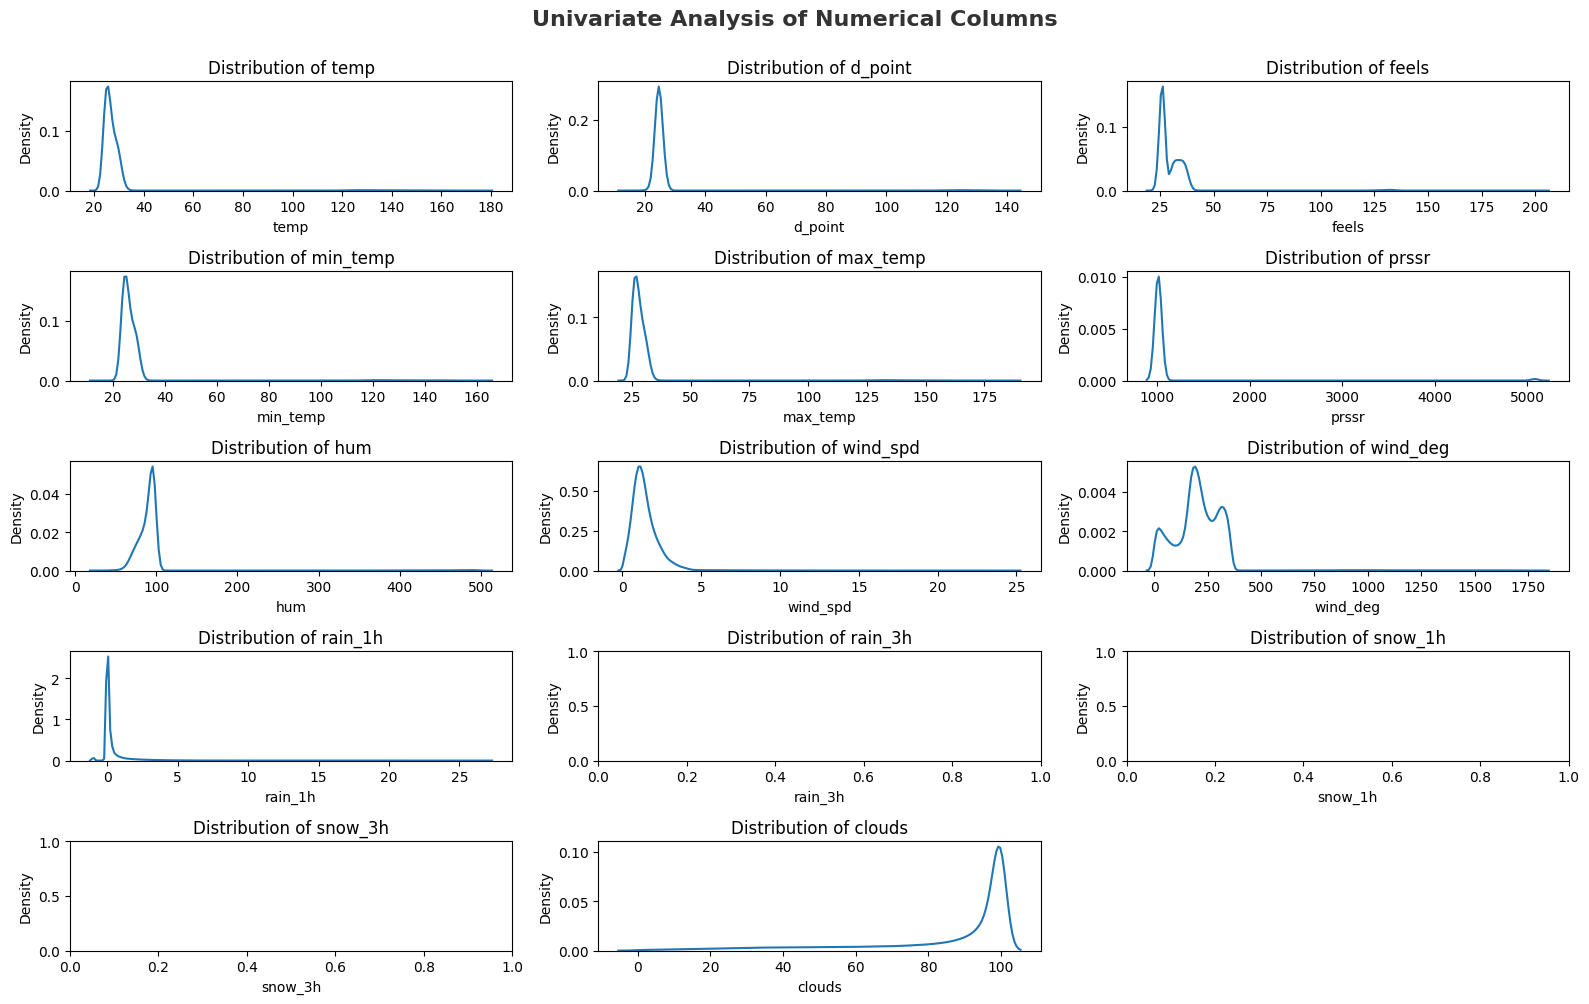

In [17]:
def univariate_analysis(preped_train):
    # Filter the DataFrame to include only numerical columns
    numerical_columns = preped_train.select_dtypes(include=['number'])
    
    # Determine the number of rows and columns for subplots dynamically
    num_numerical_cols = len(numerical_columns.columns)
    num_subplot_cols = 3  # Number of columns for subplots
    
    num_subplot_rows = (num_numerical_cols + num_subplot_cols - 1) // num_subplot_cols  # Calculate number of rows
    
    # Create subplots
    plt.figure(figsize=(16, 10))
    plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
    for i, column in enumerate(numerical_columns.columns):
        plt.subplot(num_subplot_rows, num_subplot_cols, i + 1)
        sns.kdeplot(data=numerical_columns[column])
        plt.title(f'Distribution of {column}')
    
    plt.tight_layout()
    plt.show()

univariate_analysis(preped_train)

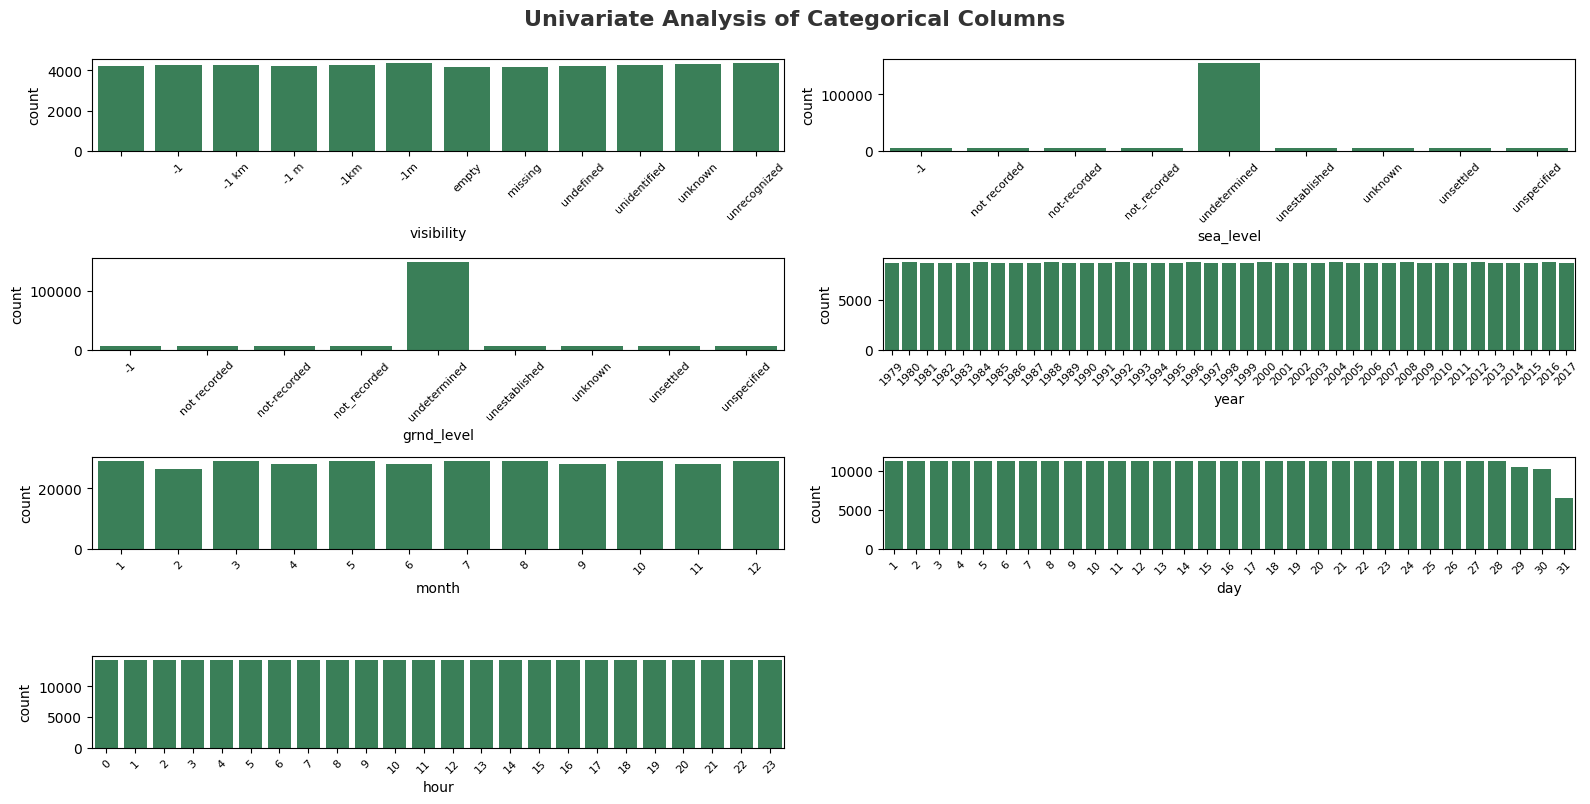

In [18]:
# categorical columns
plt.figure(figsize=(16, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols + 1) // 2  # Calculate the number of rows needed for 2 columns
for i in range(0, num_cat_cols):
    plt.subplot(num_rows, 2, i+1)  # Use 2 columns
    sns.countplot(x=preped_train[cat_cols[i]], color='seagreen')
    plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels by 45 degrees and set fontsize
    plt.tight_layout()

# If there are more than 6 categorical columns, you can decide how to handle them.
# The number of rows will adjust accordingly for 2 columns.

<Axes: >

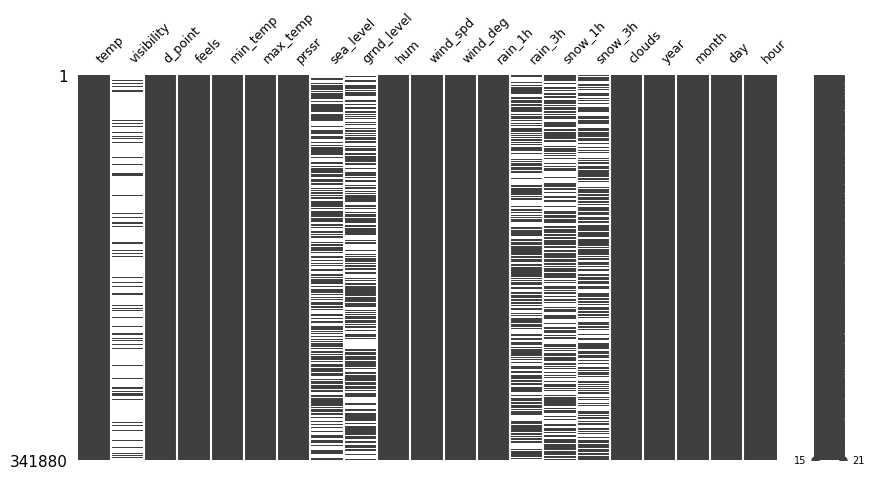

In [19]:
mno.matrix(preped_train, figsize=(10, 5), fontsize=9)

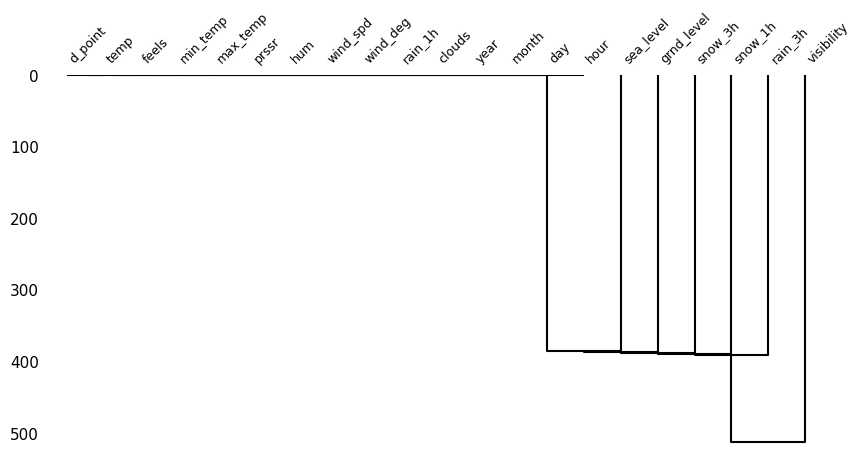

In [20]:
mno.dendrogram(preped_train, figsize=(10,5), fontsize=9);

<Axes: >

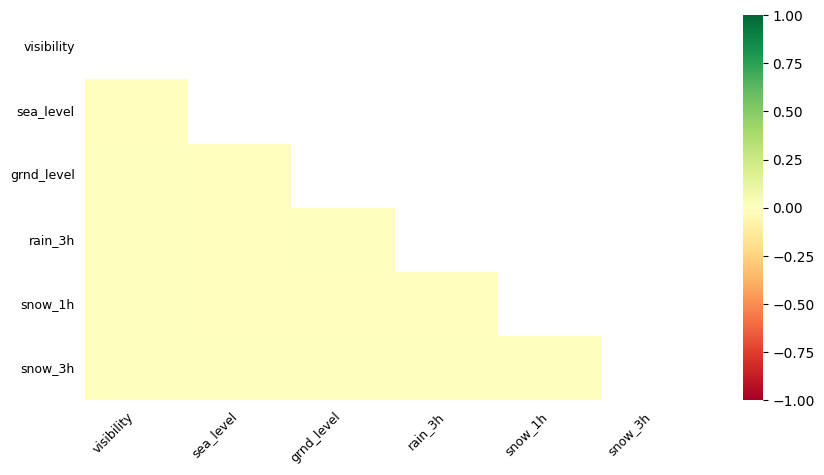

In [21]:
mno.heatmap(preped_train, cmap="RdYlGn", figsize=(10, 5), fontsize=9)

# Data preparation II

## Pay attention to the dataset before and after

In [22]:
preped_train.iloc[:3]

temp    visibility  d_point  feels  min_temp  max_temp   prssr  \
0  24.75           NaN    23.89  25.76     24.28     25.22  1012.0   
1  24.58           NaN    23.73  25.57     23.99     25.26  1012.0   
2  26.60  unidentified    24.06  26.60     26.10     27.39  1012.0   

      sea_level    grnd_level   hum  ...  wind_deg  rain_1h  rain_3h  snow_1h  \
0  undetermined           NaN  95.0  ...     320.0      0.0      0.0      NaN   
1           NaN           NaN  95.0  ...     338.0      0.0      0.0      0.0   
2           NaN  undetermined  86.0  ...     339.0      0.0      0.0      NaN   

   snow_3h  clouds  year month day hour  
0      NaN   100.0  1979     1   1    0  
1      0.0   100.0  1979     1   1    1  
2      NaN    99.0  1979     1   1    2  

[3 rows x 21 columns]

In [23]:
preped_test.iloc[:3]

temp    visibility  d_point  feels  min_temp  max_temp   prssr  \
0  26.59           NaN    23.66  26.59     26.02     27.16  1009.0   
1  26.51           NaN    24.92  26.51     26.06     28.04  1009.0   
2  28.68  unidentified    25.71  34.68     28.03     29.30  1009.0   

      sea_level    grnd_level   hum  wind_spd  wind_deg  rain_3h  snow_1h  \
0  undetermined           NaN  84.0      1.45     355.0      0.0      NaN   
1           NaN           NaN  91.0      1.67     351.0      0.0      0.0   
2           NaN  undetermined  84.0      1.72     345.0      0.0      0.0   

   snow_3h  clouds  year month day hour  
0      0.0    97.0  1979     1   1    0  
1      0.0    95.0  1979     1   1    1  
2      0.0    90.0  1979     1   1    2

## Feature Engineering

In [24]:
# feature engineering : cloudy => 1 if yes (>70), 0 if no (<=70) 
preped_train['cloudy'] = preped_train['clouds'].apply(lambda x: 1 if x > 70 else 0)
preped_test['cloudy'] = preped_test['clouds'].apply(lambda x: 1 if x > 70 else 0)

# feature engineering : temp_range => max_temp - min_temp
preped_train['temp_range'] = preped_train['max_temp'] - preped_train['min_temp']
preped_test['temp_range'] = preped_test['max_temp'] - preped_test['min_temp']

# feature engineering : hot_day => 1 if yes (>25), 0 if no (<=25) 
preped_train['hot_day'] = preped_train['temp'].apply(lambda x: 1 if x > 25 else 0)
preped_test['hot_day'] = preped_test['temp'].apply(lambda x: 1 if x > 25 else 0)

# win deg nya di anu pake modulus
preped_train["wind_deg"] = preped_train["wind_deg"] \
                                .apply(lambda x: x % 360 if x > 360 else x)
preped_test["wind_deg"] = preped_test["wind_deg"] \
                                .apply(lambda x: x % 360 if x > 360 else x)

## Winsorizing

In [25]:
left_skewed = ['clouds']
right_skewed = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'rain_1h']

for column in left_skewed:
    preped_train[column] = winsorize(preped_train[column], limits=[0.020, 0.000])

for column in right_skewed:
    preped_train[column] = winsorize(preped_train[column], limits=[0.000, 0.010])

Data distribution after winsorizing

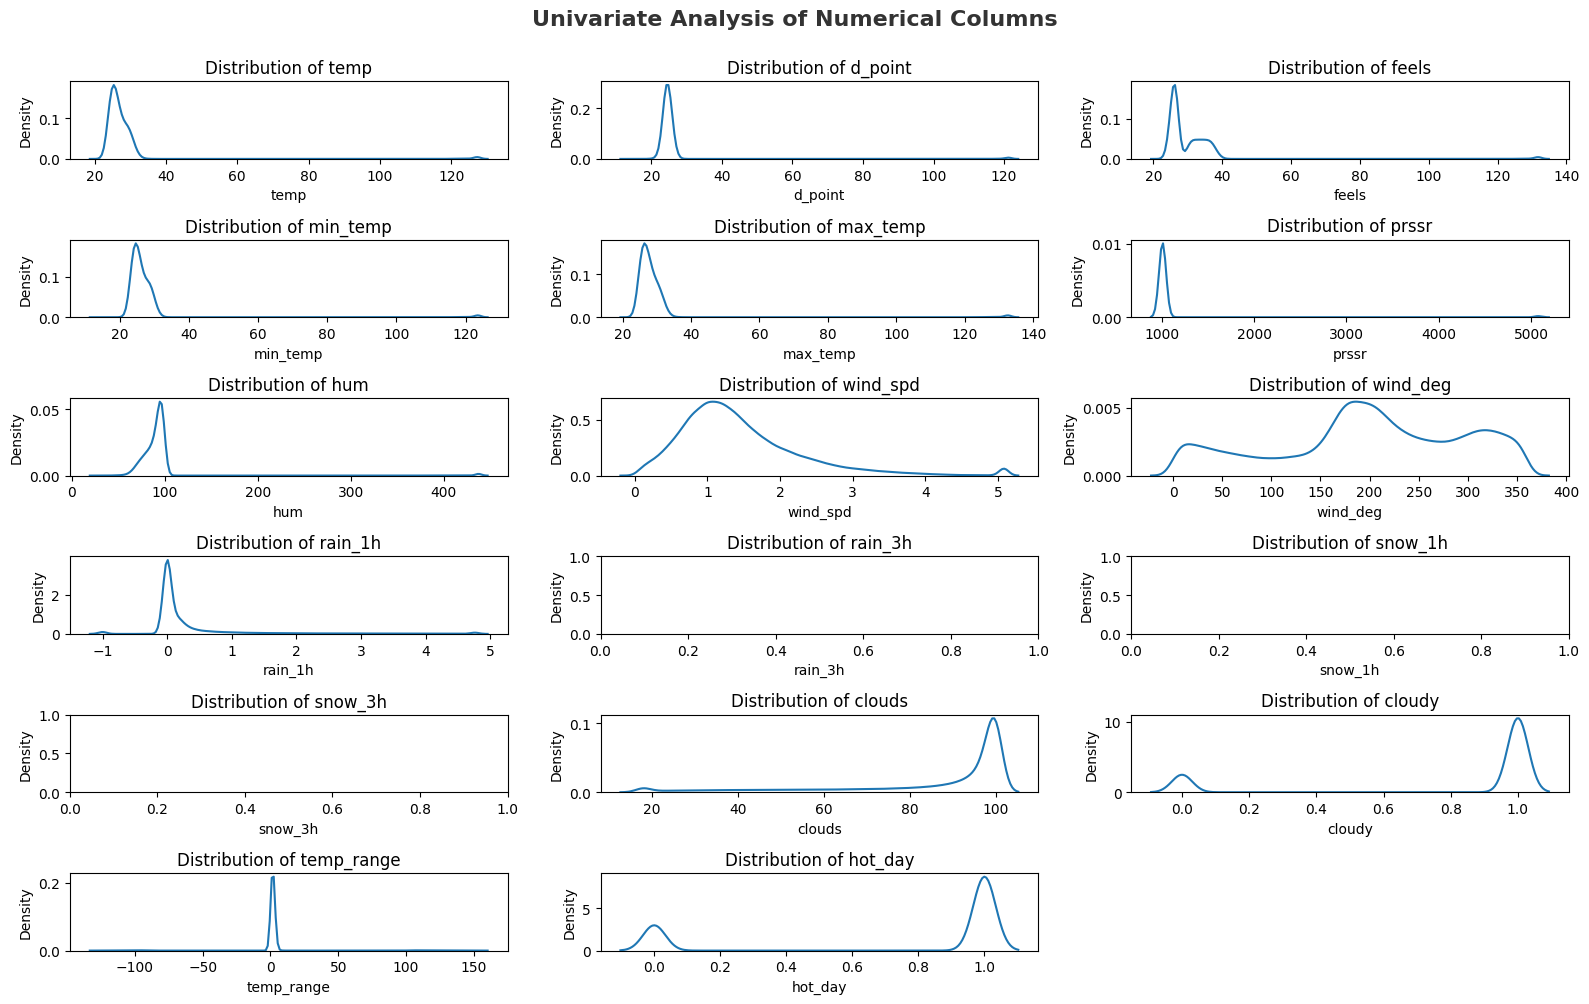

In [26]:
univariate_analysis(preped_train)

## vtreat

In [27]:
transform = vtreat.NumericOutcomeTreatment(
    outcome_name="rain_1h",
    params=vtreat.vtreat_parameters({
        "missingness_imputation": np.mean,
        "filter_to_recommended": False
    })
)

transformed_train = transform.fit_transform(preped_train)
transformed_test = transform.transform(preped_test)
transform.score_frame_

variable orig_variable          treatment  y_aware  \
0                snow_3h_is_bad       snow_3h  missing_indicator    False   
1                snow_1h_is_bad       snow_1h  missing_indicator    False   
2             grnd_level_is_bad    grnd_level  missing_indicator    False   
3              sea_level_is_bad     sea_level  missing_indicator    False   
4             visibility_is_bad    visibility  missing_indicator    False   
5                rain_3h_is_bad       rain_3h  missing_indicator    False   
6                      wind_deg      wind_deg         clean_copy    False   
7                      max_temp      max_temp         clean_copy    False   
8                      wind_spd      wind_spd         clean_copy    False   
9                        clouds        clouds         clean_copy    False   
10                     min_temp      min_temp         clean_copy    False   
11                         temp          temp         clean_copy    False   
12                          hum           hum         clean_copy    False   
13                        prssr         prssr         clean_copy    False   
14                       cloudy        cloudy         clean_copy    False   
15                      hot_day       hot_day         clean_copy    False   
16                         hour          hour         clean_copy    False   
17                         year          year         clean_copy    False   
18                   temp_range    temp_range         clean_copy    False   
19                          day           day         clean_copy    False   
20                        feels         feels         clean_copy    False   
21                        month         month         clean_copy    False   
22                      d_point       d_point         clean_copy    False   
23       grnd_level_impact_code    grnd_level        impact_code     True   
24    grnd_level_deviation_code    grnd_level     deviation_code     True   
25   grnd_level_prevalence_code    grnd_level    prevalence_code    False   
26          grnd_level_lev__NA_    grnd_level     indicator_code    False   
27  grnd_level_lev_undetermined    grnd_level     indicator_code    False   
28        sea_level_impact_code     sea_level        impact_code     True   
29     sea_level_deviation_code     sea_level     deviation_code     True   
30    sea_level_prevalence_code     sea_level    prevalence_code    False   
31   sea_level_lev_undetermined     sea_level     indicator_code    False   
32           sea_level_lev__NA_     sea_level     indicator_code    False   
33       visibility_impact_code    visibility        impact_code     True   
34    visibility_deviation_code    visibility     deviation_code     True   
35   visibility_prevalence_code    visibility    prevalence_code    False   
36          visibility_lev__NA_    visibility     indicator_code    False   

    has_range  PearsonR            R2   significance  vcount  \
0        True -0.001492  2.226131e-06   3.829955e-01     6.0   
1        True  0.000617  3.809518e-07   7.181845e-01     6.0   
2        True  0.001521  2.313351e-06   3.738331e-01     6.0   
3        True -0.000337  1.133066e-07   8.439707e-01     6.0   
4        True  0.000668  4.464479e-07   6.960341e-01     6.0   
5        True  0.001739  3.024776e-06   3.091966e-01     6.0   
6        True -0.033399  1.115520e-03   5.624232e-85    17.0   
7        True  0.025913  6.714745e-04   7.145723e-52    17.0   
8        True -0.073530  5.406718e-03   0.000000e+00    17.0   
9        True  0.132229  1.748439e-02   0.000000e+00    17.0   
10       True  0.029946  8.967638e-04   1.131265e-68    17.0   
11       True  0.030561  9.339552e-04   1.910992e-71    17.0   
12       True -0.021214  4.500318e-04   2.447311e-35    17.0   
13       True  0.000691  4.773386e-07   6.862351e-01    17.0   
14       True  0.118758  1.410335e-02   0.000000e+00    17.0   
15       True  0.090215  8.138721e-03   0.000000e+00    17.0   
16      

In [28]:
transformed_train.iloc[:3]

rain_1h  snow_3h_is_bad  snow_1h_is_bad  grnd_level_is_bad  \
0      0.0             1.0             1.0                1.0   
1      0.0             0.0             0.0                1.0   
2      0.0             1.0             1.0                0.0   

   sea_level_is_bad  visibility_is_bad  rain_3h_is_bad  wind_deg  max_temp  \
0               0.0                1.0             0.0     320.0     25.22   
1               1.0                1.0             0.0     338.0     25.26   
2               1.0                0.0             0.0     339.0     27.39   

   wind_spd  ...  grnd_level_lev_undetermined  sea_level_impact_code  \
0      0.82  ...                          0.0               0.000371   
1      0.96  ...                          0.0               0.000000   
2      1.22  ...                          1.0               0.000000   

   sea_level_deviation_code  sea_level_prevalence_code  \
0                  0.840727                   0.452153   
1                  0.838063                   0.435580   
2                  0.838063                   0.435580   

   sea_level_lev_undetermined  sea_level_lev__NA_  visibility_impact_code  \
0                         1.0                 0.0                0.000000   
1                         0.0                 1.0                0.000000   
2                         0.0                 1.0                0.012509   

   visibility_deviation_code  visibility_prevalence_code  visibility_lev__NA_  
0                   0.840813                    0.850497                  1.0  
1                   0.840402                    0.850497                  1.0  
2                   0.859956                    0.012469                  0.0  

[3 rows x 38 columns]

In [29]:
transformed_test.iloc[:3]

snow_3h_is_bad  snow_1h_is_bad  grnd_level_is_bad  sea_level_is_bad  \
0             0.0             1.0                1.0               0.0   
1             0.0             0.0                1.0               1.0   
2             0.0             0.0                0.0               1.0   

   visibility_is_bad  rain_3h_is_bad  wind_deg  max_temp  wind_spd  clouds  \
0                1.0             0.0     355.0     27.16      1.45    97.0   
1                1.0             0.0     351.0     28.04      1.67    95.0   
2                0.0             0.0     345.0     29.30      1.72    90.0   

   ...  grnd_level_lev_undetermined  sea_level_impact_code  \
0  ...                          0.0               0.000239   
1  ...                          0.0               0.000000   
2  ...                          1.0               0.000000   

   sea_level_deviation_code  sea_level_prevalence_code  \
0                  0.841698                   0.452153   
1                  0.838526                   0.435580   
2                  0.838526                   0.435580   

   sea_level_lev_undetermined  sea_level_lev__NA_  visibility_impact_code  \
0                         1.0                 0.0                0.000000   
1                         0.0                 1.0                0.000000   
2                         0.0                 1.0                0.013019   

   visibility_deviation_code  visibility_prevalence_code  visibility_lev__NA_  
0                   0.840187                    0.850497                  1.0  
1                   0.840187                    0.850497                  1.0  
2                   0.852473                    0.012469                  0.0  

[3 rows x 37 columns]

## PyCaret

## Train-Test-Validation Split

In [30]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(
                                        transformed_train,
                                        target = 'rain_1h',
                                        train_size=0.7, valid_size=0.15, test_size=0.15, random_state=7)

# Machine Learning I

In [31]:
params = {
        'iterations': 35000,
        'eval_metric': "RMSE",
        'task_type': "GPU",
        'verbose':True,
        'od_type':'Iter'}

cat_regressor = CatBoostRegressor(**params)

In [32]:
cat_regressor.fit(X_train, y_train, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009912
0:	learn: 0.8385619	total: 17.3ms	remaining: 10m 6s
1:	learn: 0.8368922	total: 25.7ms	remaining: 7m 30s
2:	learn: 0.8352586	total: 33.9ms	remaining: 6m 35s
3:	learn: 0.8336491	total: 41.9ms	remaining: 6m 6s
4:	learn: 0.8320715	total: 50.1ms	remaining: 5m 50s
5:	learn: 0.8305122	total: 58.3ms	remaining: 5m 39s
6:	learn: 0.8289697	total: 66.4ms	remaining: 5m 31s
7:	learn: 0.8275014	total: 74.4ms	remaining: 5m 25s
8:	learn: 0.8260160	total: 82.3ms	remaining: 5m 20s
9:	learn: 0.8245539	total: 90.5ms	remaining: 5m 16s
10:	learn: 0.8231298	total: 98.4ms	remaining: 5m 13s
11:	learn: 0.8217216	total: 106ms	remaining: 5m 9s
12:	learn: 0.8203349	total: 114ms	remaining: 5m 6s
13:	learn: 0.8190008	total: 122ms	remaining: 5m 4s
14:	learn: 0.8176767	total: 129ms	remaining: 5m 1s
15:	learn: 0.8163407	total: 137ms	remaining: 5m
16:	learn: 0.8150787	total: 145ms	remaining: 4m 59s
17:	learn: 0.8138193	total: 153ms	remaining: 4m 57s
18:	learn: 0.8125683	total: 161ms	remainin

In [33]:
y_pred = cat_regressor.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.698531943581824


## PyCaret ML

# Machine Learning II (Using full training dataset)

In [34]:
full_train = transformed_train.drop('rain_1h', axis=1)
full_target = transformed_train['rain_1h']

In [35]:
cat_regressor.fit(full_train, full_target, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010386
0:	learn: 0.8375602	total: 9.34ms	remaining: 5m 27s
1:	learn: 0.8358295	total: 18ms	remaining: 5m 14s
2:	learn: 0.8341415	total: 26.8ms	remaining: 5m 13s
3:	learn: 0.8324801	total: 35.4ms	remaining: 5m 10s
4:	learn: 0.8308834	total: 44.1ms	remaining: 5m 8s
5:	learn: 0.8292713	total: 52.6ms	remaining: 5m 7s
6:	learn: 0.8277293	total: 61.3ms	remaining: 5m 6s
7:	learn: 0.8261736	total: 70ms	remaining: 5m 6s
8:	learn: 0.8246444	total: 78.5ms	remaining: 5m 5s
9:	learn: 0.8231400	total: 87.4ms	remaining: 5m 5s
10:	learn: 0.8216972	total: 95.8ms	remaining: 5m 4s
11:	learn: 0.8202786	total: 104ms	remaining: 5m 4s
12:	learn: 0.8188504	total: 113ms	remaining: 5m 3s
13:	learn: 0.8174812	total: 122ms	remaining: 5m 3s
14:	learn: 0.8160870	total: 130ms	remaining: 5m 3s
15:	learn: 0.8147680	total: 139ms	remaining: 5m 3s
16:	learn: 0.8134698	total: 147ms	remaining: 5m 2s
17:	learn: 0.8121959	total: 155ms	remaining: 5m 2s
18:	learn: 0.8109448	total: 164ms	remaining: 5m 2s


In [39]:
xgb_regressor = XGBRegressor()
lgbm_regressor = LGBMRegressor()

In [40]:
xgb_regressor.fit(full_train, full_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
lgbm_regressor.fit(full_train, full_target)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2723
[LightGBM] [Info] Number of data points in the train set: 341880, number of used features: 37
[LightGBM] [Info] Start training from score 0.321850


LGBMRegressor()

In [42]:
cat_y_pred = cat_regressor.predict(X_test)
xgb_y_pred = xgb_regressor.predict(X_test)
lgbm_y_pred = lgbm_regressor.predict(X_test)

ensembled_y_pred = (
   ( 0.6 * cat_y_pred ) +
   ( 0.1 * xgb_y_pred ) +
   ( 0.3 * lgbm_y_pred ) 
)

print('RMSE:', np.sqrt(mean_squared_error(y_test, ensembled_y_pred)))

RMSE: 0.6479785133458476


# Evaluation

## Explainable AI

Explainable AI is a research field on ML interpretability techniques whose aims are to understand machine learning model predictions and explain them in human and understandable terms **to build trust with stakeholders**.

- *Interpretability* focuses on model understanding techniques.
- While *explainability* more broadly focuses on model explanations and the interface for translating these explanations in human, understandable terms for different stakeholders.

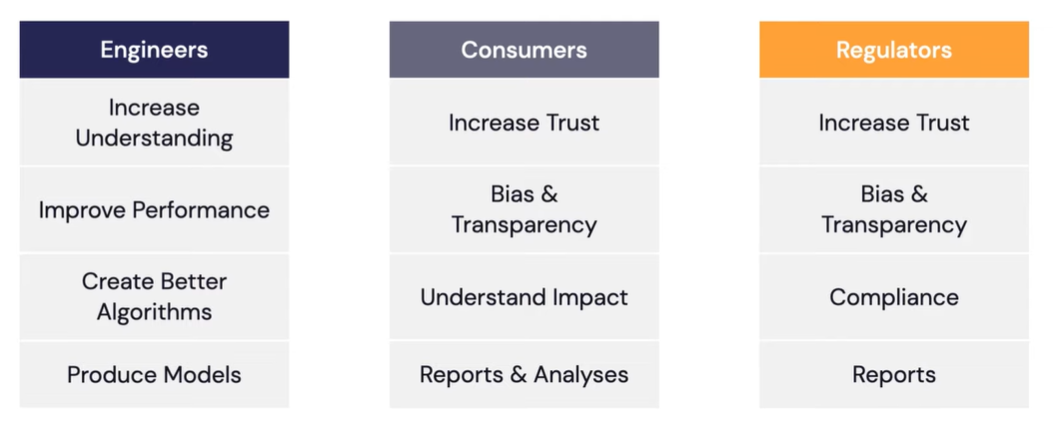

### SHAP (SHapley Additive exPlanations)

In [ ]:
#pip install shap

In [43]:
import shap
from catboost import Pool

shap_values = cat_regressor.get_feature_importance(Pool(X_test, label=y_test), type="ShapValues")
shap_values = shap_values[:,:-1]

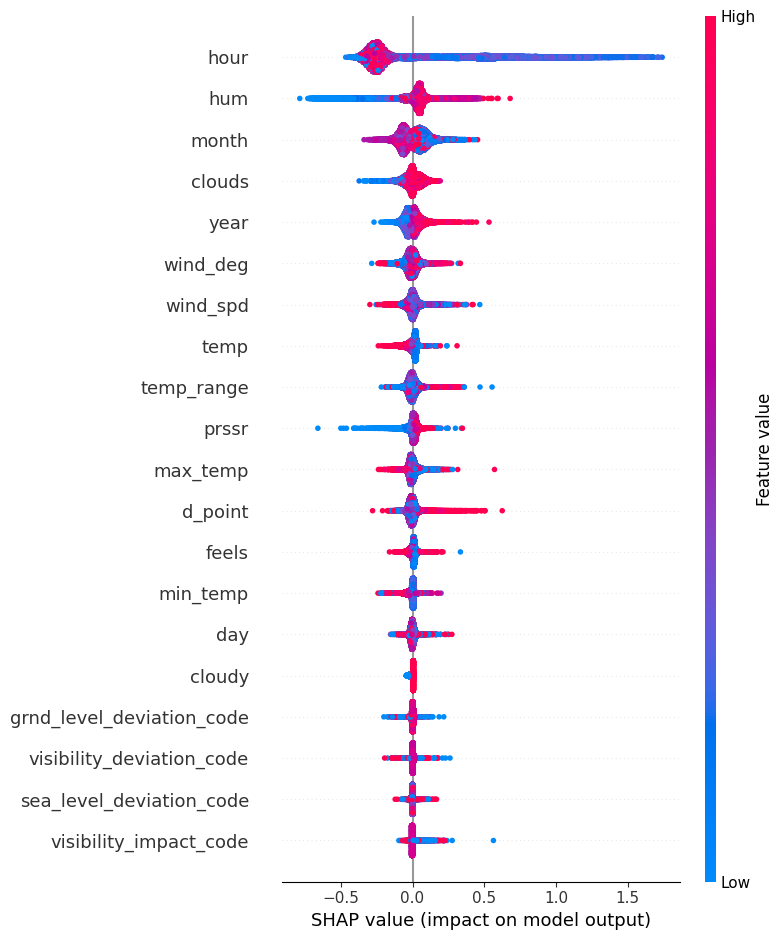

In [44]:
shap.summary_plot(shap_values, X_test)

### LIME (Local Interpretable Model-Agnostic Explanations)

In [ ]:
#pip install lime

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Submission

In [45]:
submission = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [46]:
cat_y_pred = cat_regressor.predict(transformed_test)
xgb_y_pred = xgb_regressor.predict(transformed_test)
lgbm_y_pred = lgbm_regressor.predict(transformed_test)

ensembled_y_pred = (
   ( 0.6 * cat_y_pred ) +
   ( 0.1 * xgb_y_pred ) +
   ( 0.3 * lgbm_y_pred ) 
)

submission['rain_1h'] = ensembled_y_pred
submission['rain_1h'] = submission['rain_1h'].apply(lambda x: 0. if x < 0 else x)
submission.to_csv('submission1_radif.csv', index=False)

<Axes: xlabel='rain_1h', ylabel='Density'>

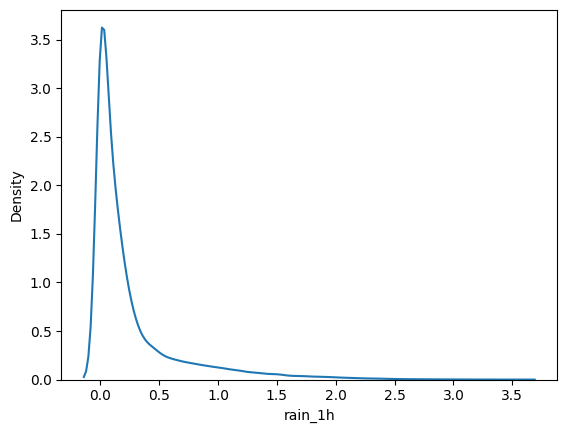

In [47]:
sns.kdeplot(data=submission['rain_1h'])

In [50]:
submission['rain_1h'].describe()

count    49368.000000
mean         0.253535
std          0.406925
min          0.000000
25%          0.002202
50%          0.096690
75%          0.277603
max          3.550296
Name: rain_1h, dtype: float64

## Export

In [48]:
transformed_train.to_csv('exported_train_radif.csv', index=False)
transformed_test.to_csv('exported_test_radif.csv', index=False)

In [ ]:
import pickle 

pickle.dump(cat_regressor, open('submission_radif.pkl', 'wb'))